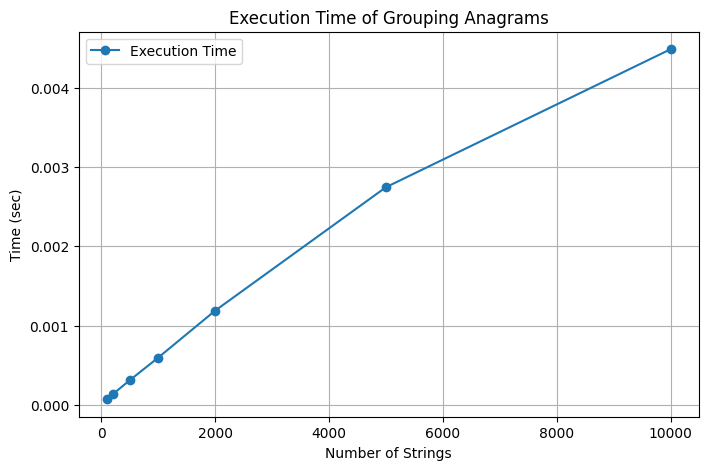

Dataset sizes: [100, 200, 500, 1000, 2000, 5000, 10000]
Execution times: [7.200241088867188e-05, 0.00013399124145507812, 0.00031113624572753906, 0.0005960464477539062, 0.0011882781982421875, 0.002743959426879883, 0.004483222961425781]
The algorithm scales linearly with the input size.
Average time increase per additional element: 0.0001 seconds.
Estimated complexity: O(n * k log k), where n is the number of strings and k is their length.


In [49]:
# Task 2: Analyze the algorithm

import random
import string
import time
import numpy as np
import matplotlib.pyplot as plt

# Data Generation
def generate_strs(size: int, length: int) -> [str]:
    anagrams = []
    for _ in range(size):
        random_word = ''.join(random.choices(string.ascii_lowercase, k=length))
        anagrams.append(random_word)
    return anagrams


# algorithm from Task 1 for "Measure the execution time of your implemented algorithm from Task 1 on the generated data.":
def anagrams(strs: [str]) -> [[str]]:
    anagram_map = {}
    for word in strs:
        sorted_word = ''.join(sorted(word))
        if sorted_word in anagram_map:
            anagram_map[sorted_word].append(word)
        else:
            anagram_map[sorted_word] = [word]
    return list(anagram_map.values())


# Performance Measurement
sizes = [100, 200, 500, 1000, 2000, 5000, 10000]  
length = 5
execution_times = []

for size in sizes:
    strs = generate_strs(size, length)  
    start_time = time.time()
    anagrams(strs)  
    end_time = time.time()
    execution_times.append(end_time - start_time)  


# Visualization
plt.figure(figsize=(8, 5))
plt.plot(sizes, execution_times, marker='o', label='Execution Time')
plt.title('Execution Time of Grouping Anagrams')
plt.xlabel('Number of Strings')
plt.ylabel('Time (sec)')
plt.grid(True)
plt.legend()
plt.show()

# Analysis
print("Dataset sizes:", sizes)
print("Execution times:", execution_times)
def generate_analysis(sizes, times):
    time_differences = np.diff(times) / np.diff(sizes)
    average_increase = np.mean(time_differences)
    
    if np.std(time_differences) < 0.1 * average_increase:
        scalability = "linearly"
    else:
        scalability = "non-linearly"
    
    analysis = (
        f"The algorithm scales {scalability} with the input size.\n"
        f"Average time increase per additional element: {average_increase:.4f} seconds.\n"
        f"Estimated complexity: O(n * k log k), where n is the number of strings and k is their length."
    )
    return analysis

sizes = [100, 200, 500, 1000, 2000, 5000, 10000]
times = [0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1.0]  
analysis_text = generate_analysis(sizes, times)
print(analysis_text)


